# HW1: Noisifier

## Task description

Implement a script (preferably python) for duplicating audio data directori and adding background noise.

You can use the noise available at...

## Requirements:
* Support .wav and .flac formats
* Use both beeps and backgrownd music from bg_noise.tar.gz
* add an example audio files
* add HOWTO into README


In [11]:
import os
from enum import Enum
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# bg_noise/freesound_foreground_gsm/noise-free-sound-0000.wav

def load_audio_sec(file_path, sr=16000):
    data, _ = librosa.core.load(file_path, sr)
    if len(data) > sr:
        data = data[:sr]
    else:
        data = np.pad(data, pad_width=(0, max(0, sr - len(data))), mode="constant")
    return data

def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

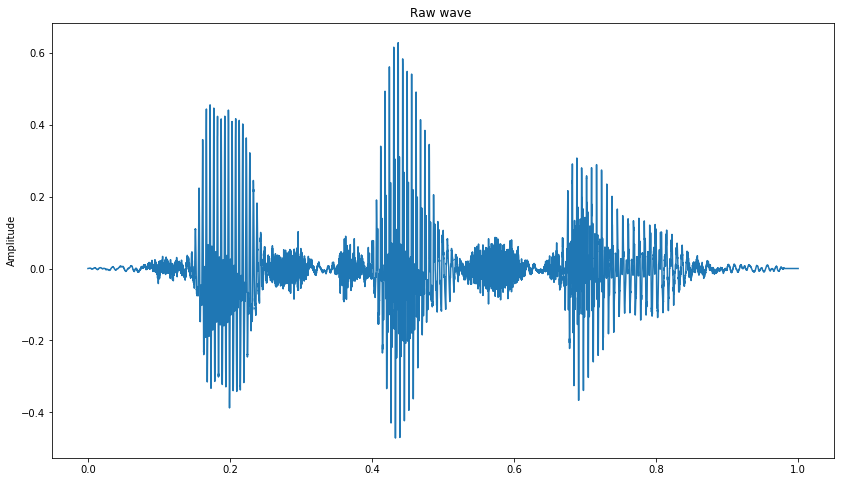

In [56]:
data = load_audio_sec("p225_001.wav")
plot_time_series(data)

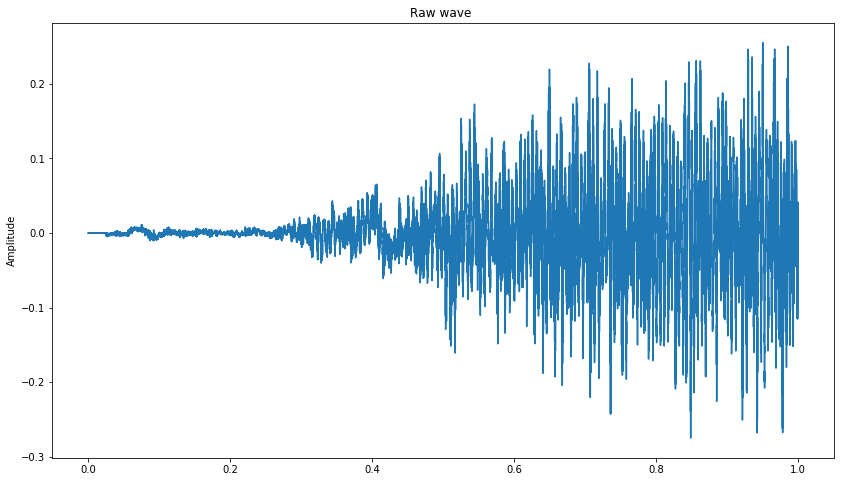

In [117]:
noise = load_audio_sec('../bg_noise/freesound_foreground_gsm/noise-free-sound-0000.wav')
plot_time_series(noise)

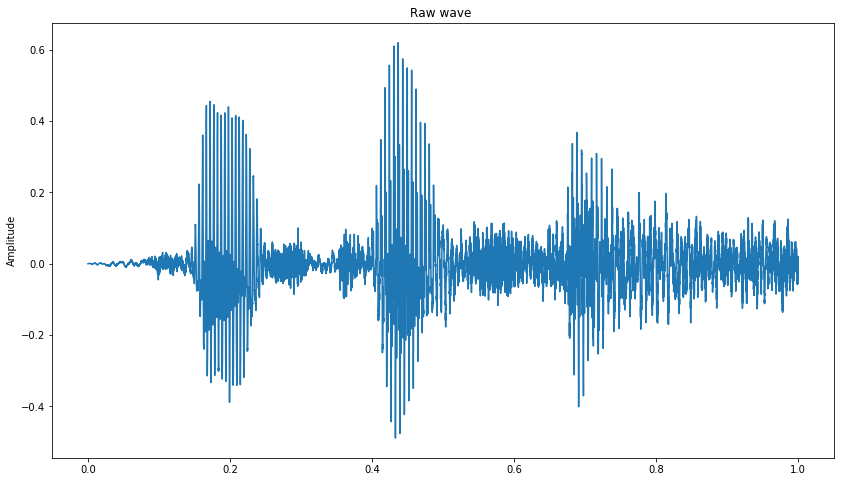

In [7]:
# add noise in .wav format

data_with_noise = data + 0.5 * noise
plot_time_series(data_with_noise)
# Limited amplitude of the noise so we can still hear the word even with the noise, 
ipd.Audio(data_with_noise, rate=16000)

In [8]:
# save result in new .wav file

librosa.output.write_wav('data_with_noise.wav', data_with_noise, sr=16000)

In [38]:
class Supported_formats(Enum):
    WAV = 1
    FLAC = 2

In [108]:
def add_noise(source_file: str, to_save_dir: str, noise_beep: str, noise_background: str,
              coef: float, format: Supported_formats):
    data = load_audio_sec(source_file)
    noise_beep = load_audio_sec(noise_beep)
    noise_backgroud = load_audio_sec(noise_background)
    
    data_with_noise = data + coef * noise_beep
    data_with_noise = data_with_noise + coef * noise_backgroud 
    
    if format == Supported_formats.WAV:
        librosa.output.write_wav(to_save_dir + source_file[:-4] + "_with_noise.wav", 
                                 data_with_noise, sr=16000)   
    elif format == Supported_formats.FLAC:
        librosa.output.write_wav(to_save_dir + source_file[:-5] + "_with_noise.flac", 
                                 data_with_noise, sr=16000)

In [116]:
add_noise("p225_001.wav", "output/", 
          "../bg_noise/FRESOUND_BEEPS_gsm/dev/105000_559685-lq.wav", 
          "../bg_noise/freesound_background_gsm/noise-free-sound-0030.wav", 
          0.5, Supported_formats.WAV)

In [110]:
def load_audio_three_sec(file_path, sr=16000):
    data, _ = librosa.core.load(file_path, sr)
    if len(data) > sr:
        data = data[:3 * sr]
    else:
        data = np.pad(data, pad_width=(0, max(0,3 * sr - len(data))), mode="constant")
    return data

In [118]:
# test FLAC handling (three seconds are more demonstrative)

data_flac = load_audio_three_sec("mein_herz_brennt_3_sec.flac")
noise = load_audio_three_sec('../bg_noise/freesound_foreground_gsm/noise-free-sound-0000.wav')
data_flac_with_noise = data_flac + 0.5 * noise
ipd.Audio(data_flac_with_noise, rate=16000)

In [119]:
add_noise("mein_herz_brennt_3_sec.flac", "output/", 
          "../bg_noise/FRESOUND_BEEPS_gsm/dev/105000_559685-lq.wav", 
          "../bg_noise/freesound_background_gsm/noise-free-sound-0030.wav", 
          0.5, Supported_formats.FLAC)